<a href="https://colab.research.google.com/github/rachitmittal1234/Colorize-Black-White-Images-OpenCv-/blob/main/bw_to_color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python numpy


In [8]:
from google.colab import files
uploaded = files.upload()


Saving pts_in_hull.npy to pts_in_hull.npy


In [9]:
!ls models



ls: cannot access 'models': No such file or directory


In [10]:
!mkdir models


In [11]:
!mv colorization_deploy_v2.prototxt models/
!mv pts_in_hull.npy models/
!mv colorization_release_v2.caffemodel models/


In [12]:
!ls models


colorization_deploy_v2.prototxt     pts_in_hull.npy
colorization_release_v2.caffemodel


In [18]:
from google.colab import files
uploaded = files.upload()


Saving image.jpg to image.jpg


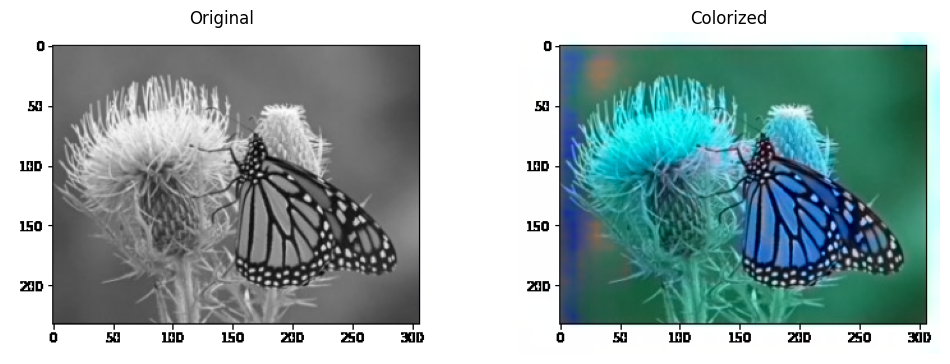

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Paths
proto = "models/colorization_deploy_v2.prototxt"
model = "models/colorization_release_v2.caffemodel"
pts = "models/pts_in_hull.npy"

# Load network
net = cv2.dnn.readNetFromCaffe(proto, model)

# Load cluster centers
pts_in_hull = np.load(pts)
pts_in_hull = pts_in_hull.transpose().reshape(2, 313, 1, 1)

net.getLayer(net.getLayerId("class8_ab")).blobs = [pts_in_hull.astype(np.float32)]
net.getLayer(net.getLayerId("conv8_313_rh")).blobs = [np.full([1, 313], 2.606, dtype="float32")]

# Load image
image = cv2.imread("input.png")
scaled = image.astype("float32") / 255.0
lab = cv2.cvtColor(scaled, cv2.COLOR_BGR2LAB)

# Extract L channel
L = lab[:, :, 0]
L_resized = cv2.resize(L, (224, 224))
L_resized -= 50

# Predict ab channels
net.setInput(cv2.dnn.blobFromImage(L_resized))
ab = net.forward()[0].transpose((1, 2, 0))

# Resize back
ab = cv2.resize(ab, (image.shape[1], image.shape[0]))

# Combine L + ab
lab_out = np.concatenate((L[:, :, np.newaxis], ab), axis=2)
colorized = cv2.cvtColor(lab_out, cv2.COLOR_LAB2BGR)
colorized = np.clip(colorized, 0, 1)

# Show results
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Colorized")
plt.imshow(colorized)
plt.axis("off")

plt.show()


In [15]:
cv2.imwrite("colorized.jpg", (colorized * 255).astype("uint8"))
files.download("colorized.jpg")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>